<a href="https://colab.research.google.com/github/shobhitagarwal083/COVID-19-DETECTION/blob/main/Covid19(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np #numerical operation
import matplotlib.pyplot as plt #visulazation

import torch
import torch.nn as nn #neurAL network
import torch.optim as optim #optimizer
from torch.utils.data import DataLoader
from torch.utils.data import random_split #random splitting

import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid



In [ ]:
data_path_train = "/content/train/"
data_path_test= "/content/test"

In [ ]:
img_size = 120

img_transform =transforms.Compose([
                                    transforms.Resize((img_size,img_size)),
                                    transforms.RandomHorizontalFlip(),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])
])

In [ ]:
!rm -rf /content/test/.ipynb_checkpoints
!rm -rf /content/train/.ipynb_checkpoints
train_data=ImageFolder(root=data_path_train,transform=img_transform)
test_data=ImageFolder(root=data_path_test,transform=img_transform)

In [ ]:
len(train_data),len(test_data)

(251, 66)

In [ ]:
train_data.class_to_idx

{'covid': 0, 'normal': 1, 'viral': 2}

In [ ]:
val_data,test_data=random_split(test_data,[50,16])

In [ ]:
len(val_data),len(test_data)

(50, 16)

In [ ]:
train_loader=DataLoader(train_data,batch_size=16,shuffle=True)
val_loader=DataLoader(val_data,batch_size=16,shuffle=True)
#test_loader=DataLoader(test_data,batch_size=16,shuffle=True)

In [ ]:
for img,label in train_loader:
  print(img.shape)
  break

torch.Size([16, 3, 120, 120])


In [ ]:
def show_img(data):
  for img,label in data:
    plt.figure(figsize=(12,6))
    plt.imshow(make_grid(img,nrow=5).permute(1,2,0))
    plt.show()
    break

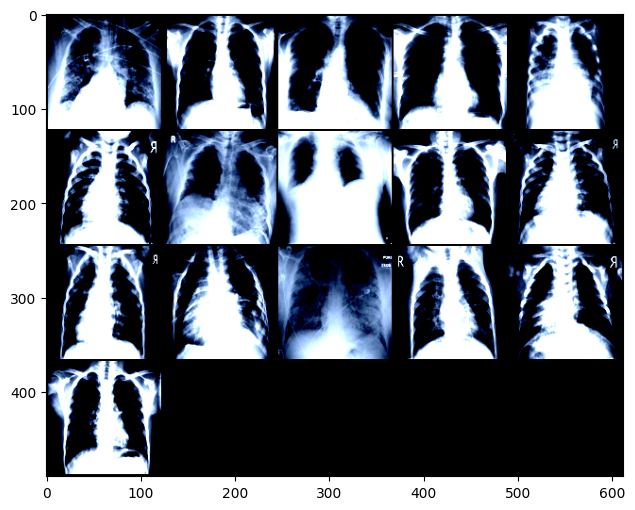

In [ ]:
show_img(train_loader)

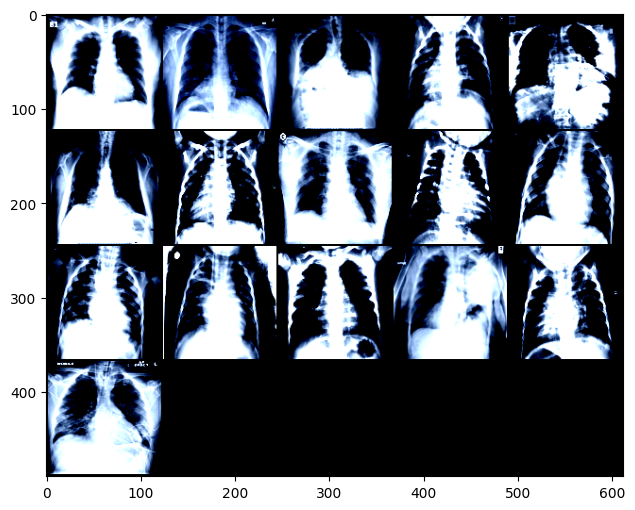

In [ ]:
show_img(val_loader)

In [ ]:
class ANN(nn.Module):
  def __init__(self,hiddden_layer=64):
    super(ANN,self).__init__()

    self.fcl=nn.Linear(120*120*3,hiddden_layer)
    self.fc2=nn.Linear(hiddden_layer,3)

    self.relu=nn.ReLU()
  def forward(self,img):
      #[n c w h]
      out=img.view(-1,120*120*3)
      out=self.fcl(out)
      out=self.relu(out)
      out=self.fc2(out)
      return out

In [ ]:
model=ANN()
print(model.parameters)

<bound method Module.parameters of ANN(
  (fcl): Linear(in_features=43200, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=3, bias=True)
  (relu): ReLU()
)>


In [ ]:
loss_fn=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.001)
#

In [ ]:
def train(model,loss_fn,optimizer):

  epochs=15

  training_loss=[]
  training_acc=[]
  validation_loss=[]
  validation_acc=[]
  for epoch in range(epochs):
    train_loss=0.0
    train_acc=0.0

    model.train()

    for images,labels in train_loader:

      optimizer.zero_grad()

      output=model(images)
      loss=loss_fn(output,labels)

      loss.backward()
      optimizer.step()

      prediction =torch.argmax(output,1)

      train_acc +=(prediction==labels).sum().item()
      #training_loss.append(loss.item())
      train_loss+=loss.item()

    training_acc.append(train_acc/len(train_data))
    training_loss.append(train_loss/len(train_loader))

    val_loss=0.0
    val_acc=0.0

    with torch.no_grad():
      for images,labels in val_loader:

        output=model(images)
        loss=loss_fn(output,labels)

        prediction=torch.argmax(output ,1)

        val_acc+=(prediction==labels).sum().item()
        val_loss+=loss.item()

      validation_loss.append(val_loss/len(val_loader))
      validation_acc.append(val_acc/len(val_data))

      print("Epochs {} , Training Acc{:.2f} , Training Loss{:.2f} , Validation Acc{:.2f}, Validation Loss{:.2f}".format(
          epoch+1,train_acc/len(train_data),train_loss/len(train_loader),val_acc/len(val_data),val_loss/len(val_loader)))

  plt.title("Accuracy vs Epochs")
  plt.plot(range(epochs),training_acc,label="Training Accuracy")
  plt.plot(range(epochs),validation_acc,label="Validation Accuracy")
  plt.legend()
  plt.xlabel("Epochs")
  plt.ylabel("Training/Validation Accuracy")
  plt.show()

  plt.title("Loss vs Epochs")
  plt.plot(range(epochs),training_loss,label="Training Loss")
  plt.plot(range(epochs),validation_loss,label="Validation Loss")
  plt.legend()
  plt.xlabel("Epochs")
  plt.ylabel("Training/Validation Loss")
  plt.show()


Epochs 1 , Training Acc0.73 , Training Loss0.64 , Validation Acc0.64, Validation Loss0.78
Epochs 2 , Training Acc0.87 , Training Loss0.36 , Validation Acc0.78, Validation Loss0.39
Epochs 3 , Training Acc0.88 , Training Loss0.30 , Validation Acc0.70, Validation Loss0.49
Epochs 4 , Training Acc0.90 , Training Loss0.26 , Validation Acc0.92, Validation Loss0.31
Epochs 5 , Training Acc0.92 , Training Loss0.22 , Validation Acc0.86, Validation Loss0.47
Epochs 6 , Training Acc0.93 , Training Loss0.20 , Validation Acc0.88, Validation Loss0.29
Epochs 7 , Training Acc0.92 , Training Loss0.18 , Validation Acc0.82, Validation Loss0.27
Epochs 8 , Training Acc0.94 , Training Loss0.16 , Validation Acc0.90, Validation Loss0.24
Epochs 9 , Training Acc0.96 , Training Loss0.14 , Validation Acc0.92, Validation Loss0.21
Epochs 10 , Training Acc0.97 , Training Loss0.14 , Validation Acc0.94, Validation Loss0.21
Epochs 11 , Training Acc0.97 , Training Loss0.13 , Validation Acc0.92, Validation Loss0.18
Epochs 1

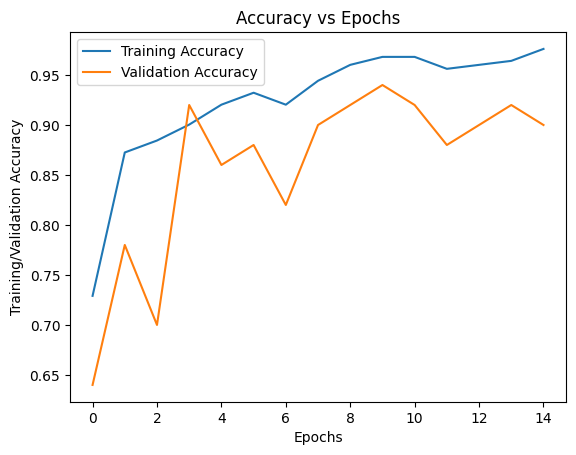

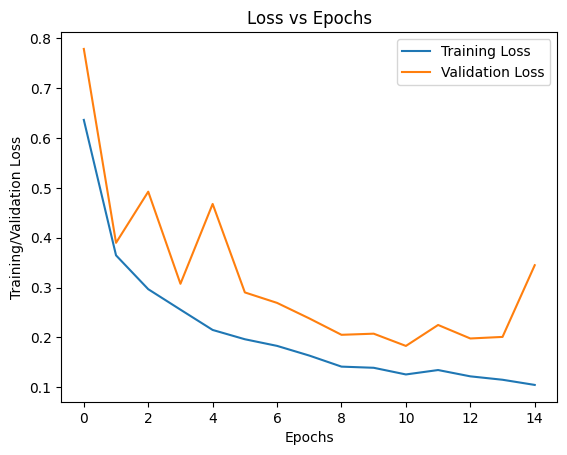

In [ ]:
train(model,loss_fn,optimizer)

In [ ]:
def predict_img(img,model):#[N C H W]
  x=img.unsqueeze(0)
  y=model(x)

  predd=torch.argmax(y,dim=1)


  return train_data.classes[pred]

Actual Label: covid Prediction Label: <function predict_img at 0x79751f1db7f0> ANN(
  (fcl): Linear(in_features=43200, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=3, bias=True)
  (relu): ReLU()
)


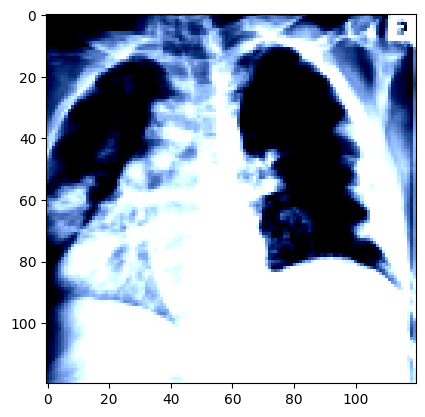

In [ ]:
img,label=test_data[2]
plt.imshow(img.permute(1,2,0))
print("Actual Label:",train_data.classes[label], "Prediction Label:",predict_img,model)

Actual Label: covid Prediction Label: <function predict_img at 0x79751f1db7f0> ANN(
  (fcl): Linear(in_features=43200, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=3, bias=True)
  (relu): ReLU()
)


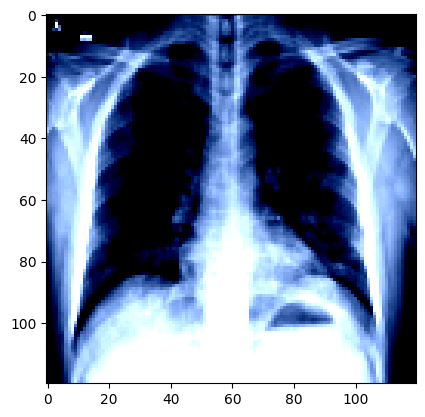

In [ ]:
img,label=test_data[10]
plt.imshow(img.permute(1,2,0))
print("Actual Label:",train_data.classes[label], "Prediction Label:",predict_img,model)

Actual Label: normal Prediction Label: <function predict_img at 0x79751f1db7f0> ANN(
  (fcl): Linear(in_features=43200, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=3, bias=True)
  (relu): ReLU()
)


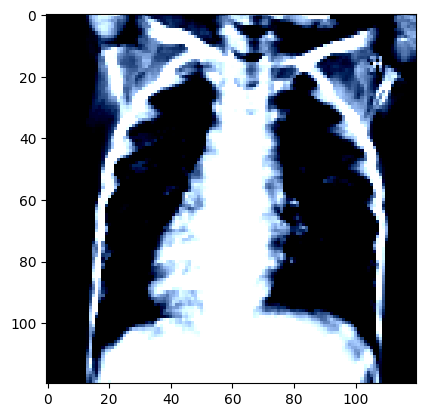

In [ ]:
img,label=test_data[15]
plt.imshow(img.permute(1,2,0))
print("Actual Label:",train_data.classes[label], "Prediction Label:",predict_img,model)